### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
# overview of dataset structure, data types
data.info()

# Missing values per column
print(data.isnull().sum())

# Summary statistics
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
raw_data = pd.read_csv('data/coupons.csv')
data = raw_data.copy()
# car column has too many missing values => drop it
data = data.drop('car', axis=1)

# fill NaN with 'never', most liekly default
freq_cols = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
data[freq_cols] = data[freq_cols].fillna('never')


4. What proportion of the total observations chose to accept the coupon?



In [6]:
# Count number of ones vs total number of rows
accepted_count = data['Y'].sum()
total_count = len(data)
acceptance_rate = accepted_count / total_count

print(f"Accepted: {accepted_count} out of {total_count}")
print(f"Proportion: {acceptance_rate:.2%}")


Accepted: 7210 out of 12684
Proportion: 56.84%


5. Use a bar plot to visualize the `coupon` column.

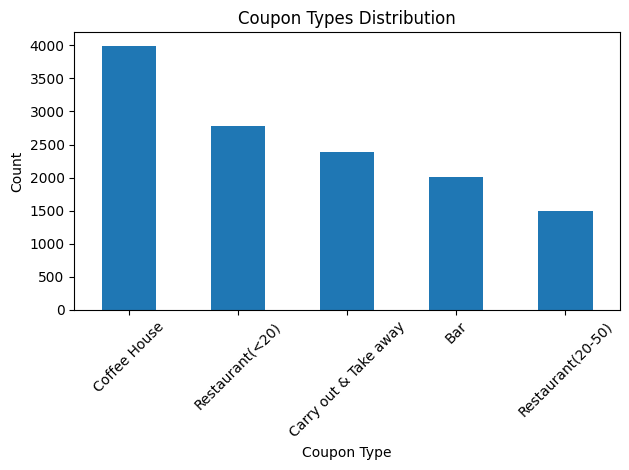

In [7]:
data['coupon'].value_counts().plot(kind='bar')
plt.title('Coupon Types Distribution')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(
    "images/coupon_distribution.png",
    dpi=200,
    bbox_inches="tight"
)
plt.show()


6. Use a histogram to visualize the temperature column.

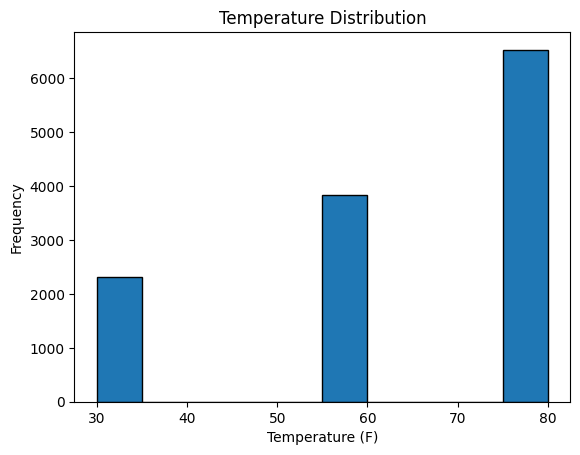

In [8]:
plt.hist(data['temperature'], bins=10, edgecolor='black')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.savefig(
    "images/temperature_distribution.png",
    dpi=200,
    bbox_inches="tight"
)
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [9]:
bar_data = data[data['coupon'] == 'Bar'].copy()



2. What proportion of bar coupons were accepted?


In [10]:
# Count number of ones vs total number of rows
accepted_count = bar_data['Y'].sum()
total_count = len(bar_data)
bar_acceptance = accepted_count / total_count

print(f"Accepted: {bar_acceptance} out of {total_count}")
print(f"Proportion: {bar_acceptance:.2%}")
print(f"Bar coupon acceptance rate: {bar_acceptance:.2%}")


Accepted: 0.41001487357461575 out of 2017
Proportion: 41.00%
Bar coupon acceptance rate: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Acceptance rate (≤3 times/month): 37.07%
Acceptance rate (>3 times/month): 76.88%


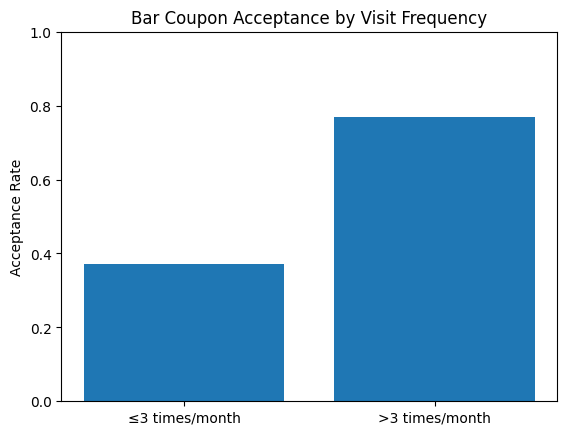

In [11]:
# group by bar visit frequency
low_freq = bar_data[bar_data['Bar'].isin(['never', 'less1', '1~3'])]
high_freq = bar_data[bar_data['Bar'].isin(['4~8', 'gt8'])]

low_rate = low_freq['Y'].mean()
high_rate = high_freq['Y'].mean()

print(f"Acceptance rate (≤3 times/month): {low_rate:.2%}")
print(f"Acceptance rate (>3 times/month): {high_rate:.2%}")

# visualize
rates = [low_rate, high_rate]
labels = ['≤3 times/month', '>3 times/month']
plt.bar(labels, rates)
plt.title('Bar Coupon Acceptance by Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.savefig(
    "images/bar_coupon_acceptance_by_visit_frequency.png",
    dpi=200,
    bbox_inches="tight"
)

plt.show()


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [12]:
%whos

Variable          Type         Data/Info
----------------------------------------
acceptance_rate   float64      0.5684326710816777
accepted_count    int64        827
bar_acceptance    float64      0.41001487357461575
bar_data          DataFrame    Shape: (2017, 25)
data              DataFrame    Shape: (12684, 25)
freq_cols         list         n=5
high_freq         DataFrame    Shape: (199, 25)
high_rate         float64      0.7688442211055276
labels            list         n=2
low_freq          DataFrame    Shape: (1818, 25)
low_rate          float64      0.37073707370737075
np                module       <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>
pd                module       <module 'pandas' from '/h<...>ages/pandas/__init__.py'>
plt               module       <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
rates             list         n=2
raw_data          DataFrame    Shape: (12684, 26)
sns               module       <module 'seaborn' from '/<...>ges/seab

In [13]:
# create a new column age_num that is pure numerical
# below21 -> 20, 50plus -> 51, others stay as numbers
bar_data['age_num'] = bar_data['age'].replace({
    'below21': 20,
    '21': 21,
    '26': 26,
    '31': 31,
    '36': 36,
    '41': 41,
    '46': 46,
    '50plus': 51
})

# filter: bar visits > once/month and age > 25
target_group = bar_data[(bar_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_data['age_num'] > 25)]
others = bar_data[~((bar_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_data['age_num'] > 25))]

target_rate = target_group['Y'].mean()
others_rate = others['Y'].mean()

print(f"Acceptance rate (bar >1/month & age >25): {target_rate:.2%}")
print(f"Acceptance rate (all others): {others_rate:.2%}")
print(f"Difference: {target_rate - others_rate:.2%}")


Acceptance rate (bar >1/month & age >25): 69.52%
Acceptance rate (all others): 33.50%
Difference: 36.02%


/tmp/ipykernel_432862/2439929921.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bar_data['age_num'] = bar_data['age'].replace({


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [14]:
# bar > once/month, passenger not kid, occupation not farming/fishing/forestry
target = bar_data[
    (bar_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (bar_data['passanger'] != 'Kid(s)') & 
    (bar_data['occupation'] != 'Farming Fishing & Forestry')
]
others = bar_data[~(
    (bar_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (bar_data['passanger'] != 'Kid(s)') & 
    (bar_data['occupation'] != 'Farming Fishing & Forestry')
)]

target_rate = target['Y'].mean()
others_rate = others['Y'].mean()

print(f"Target group acceptance: {target_rate:.2%}")
print(f"Others acceptance: {others_rate:.2%}")


Target group acceptance: 71.32%
Others acceptance: 29.60%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



Group 1 acceptance: 71.32%
Group 2 acceptance: 72.17%
Group 3 acceptance: 45.35%


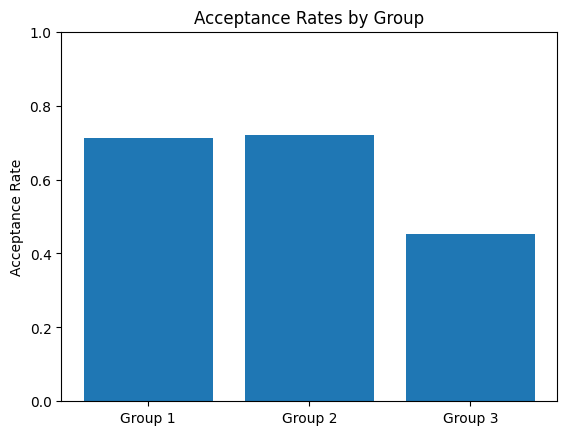

In [15]:
# Group 1: bar > once/month, no kids, not widowed
group1 = bar_data[
    (bar_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (bar_data['passanger'] != 'Kid(s)') & 
    (bar_data['maritalStatus'] != 'Widowed')
]

# Group 2: bar > once/month, age < 30
group2 = bar_data[
    (bar_data['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (bar_data['age_num'] < 30)
]

# Group 3: cheap restaurants > 4/month and income < 50K
income_under_50k = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
group3 = bar_data[
    (bar_data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & 
    (bar_data['income'].isin(income_under_50k))
]

rate1 = group1['Y'].mean()
rate2 = group2['Y'].mean()
rate3 = group3['Y'].mean()

print(f"Group 1 acceptance: {rate1:.2%}")
print(f"Group 2 acceptance: {rate2:.2%}")
print(f"Group 3 acceptance: {rate3:.2%}")

plt.bar(['Group 1', 'Group 2', 'Group 3'], [rate1, rate2, rate3])
plt.title('Acceptance Rates by Group')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.show()


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [17]:
# Drivers who accept bar coupons tend to be frequent bar-goers (more than once a month),
# are typically between above 25 and under 30, and are less likely to have children as passengers.
# The acceptance rate is significantly higher for those who regularly visit bars compared to those who rarely or never do.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [18]:
# Investigating Coffee House coupons
coffee_data = data[data['coupon'] == 'Coffee House']
print(f"Coffee House coupons: {len(coffee_data)}")
coffee_acceptance = coffee_data['Y'].mean()
print(f"Coffee House acceptance rate: {coffee_acceptance:.2%}")


Coffee House coupons: 3996
Coffee House acceptance rate: 49.92%


In [19]:
# Compare by coffee house visit frequency
coffee_low = coffee_data[coffee_data['CoffeeHouse'].isin(['never', 'less1', '1~3'])]
coffee_high = coffee_data[coffee_data['CoffeeHouse'].isin(['4~8', 'gt8'])]

print(f"Low frequency acceptance: {coffee_low['Y'].mean():.2%}")
print(f"High frequency acceptance: {coffee_high['Y'].mean():.2%}")


Low frequency acceptance: 44.96%
High frequency acceptance: 67.50%


time
10AM    0.640712
10PM    0.424242
2PM     0.547859
6PM     0.412626
7AM     0.445783
Name: Y, dtype: float64


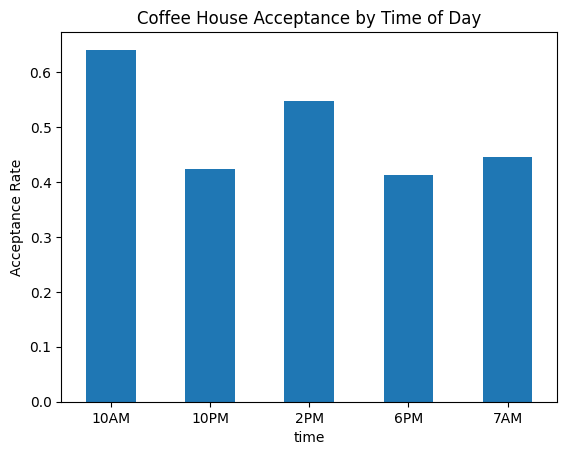

In [20]:
# Check time of day impact
coffee_data['time'].value_counts()
time_acceptance = coffee_data.groupby('time')['Y'].mean()
print(time_acceptance)

time_acceptance.plot(kind='bar')
plt.title('Coffee House Acceptance by Time of Day')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=0)
plt.show()


expiration
1d    0.583946
2h    0.431971
Name: Y, dtype: float64


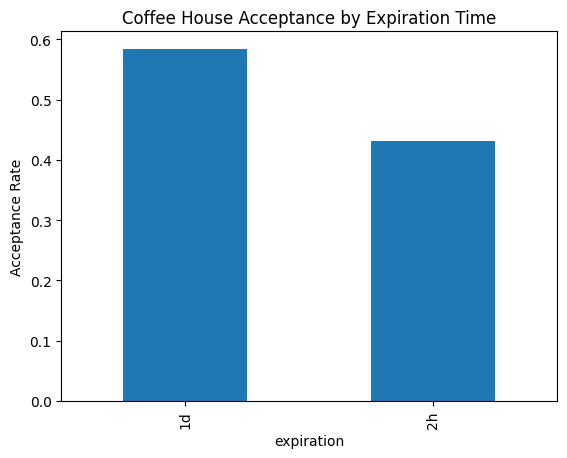

In [21]:
# Check expiration time impact
exp_acceptance = coffee_data.groupby('expiration')['Y'].mean()
print(exp_acceptance)

exp_acceptance.plot(kind='bar')
plt.title('Coffee House Acceptance by Expiration Time')
plt.ylabel('Acceptance Rate')
plt.show()


In [ ]:
# Coffee House coupon acceptance is higher for frequent coffee house visitors.
# Time of day matters - morning (10AM) shows higher acceptance than afternoon/evening.
# Longer expiration time (1 day vs 2 hours) also increases acceptance rate.
